# Biffurcation diagram

## Plots the stable and unstable points of a dynamical 1D system.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Defining initial conditions

In [76]:
#x0 = [
    #-40.0, -35.0, -30.0, -25, -20.0, -15.0, -10.0, -8.0, -6.0, -4.0, -2.0, -1.0, -0.5, -0.05,
    #0.05, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0]

##use it carefully, it will take a very long time###
xmin = 0
xmax = 1000
x0 = np.arange(xmin, xmax, 1)

## Defining parameter interval

In [77]:
RMIN = 0.01
RMAX = 1
r = np.arange(RMIN, RMAX, .01)

## Defining the dynamical system

In [78]:
def func(x, t, r, reverse=False):
    if reverse:
        return -1.0*func(x,-t, r, False)

    #f =  r*x                      ##### exponetial growth rate - Saddle-Node Bifurcation
    #f =  r - x*x                 ##### Quadratic Equation - Saddle-Node Bifurcation
    #f =  (r+1) - x - np.exp(-x)  ##### Non-polyn. Equation - Saddle-Node Bifurcation
    #f =  x*(r-x)                 ##### Logistic Equation - Transcritical Bifurcation
    #f =  x*(r-x)- 2*x            ##### Logistic Harvest Equation - Transcritical Bifurcation
    #f =  r*np.log(x)+x-1         ##### Non-polyn. Equation - Transcritical Bifurcation
    #f =  x*x/(1+x)-r*x/(1+x*x)   ##### Non-polyn. Equation - Transcritical Bifurcation
    #f =  x*(r+x*x)               ##### Polyn. Equation - Pitchfork Bifurcation
    #f =  x - np.arctan((1+r)*x)  ##### Non-polyn. Equation - Pitchfork Bifurcation
    #f =  (1+r)*x*np.exp(-x*x) - x  ##### Non-polyn. Equation - Pitchfork Bifurcation
    #f =  (1+r)*x - np.sin(x)  #####  Non-polyn. Equation - Pitchfork Bifurcation
    #f =  x*(r + x*x*(1 - x*x))  ##### Polyn. Equation - Pitchfork Bif. w/ histeresis
    #f =  np.sin(x) - np.arctan((1+r)*x)  ##### Non-polyn. Equation - Pitchfork Bif. w/ histeresis
    #f = 1 - r/x - r/(np.sqrt(1+x*x)) ### bead on a tilted wire - Saddle-Node Bifurcation
    #f = r - x*r - (x*x*x)/2 ### bead on a tilted wire, small values to h and r - Saddle-Node Bifurcation
    f= 2 - np.sin(x)-r*x #### pendunlum on a torsional spring - 

    return f

## Gets parameters

In [79]:
stable = []
unstable = []

for x0i in x0:
    for ri in r:
        [x00, xn, xl] = spi.odeint(func, x0i, [0, 1000.0, 2000.0] , args=(ri,False))
        if abs(xn-xl) < 1e-4:
            stable.append(xn)
        else:
            stable.append(float('nan'))
    for ri in r:
        [x00, xn, xl] = spi.odeint(func, x0i, [0, 1000.0, 2000.0] , args=(ri,True))
        if abs(xn-xl) < 1e-4:
            unstable.append(xn)
        else:
            unstable.append(float('nan'))

/home/dell/.local/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


## Plotting:

No handles with labels found to put in legend.


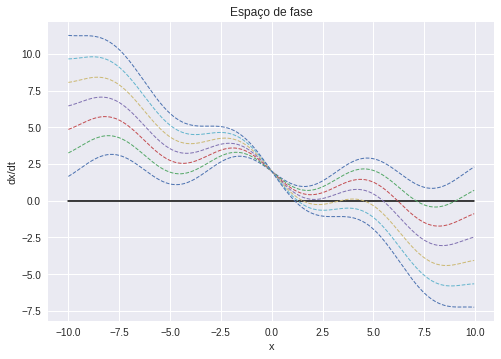

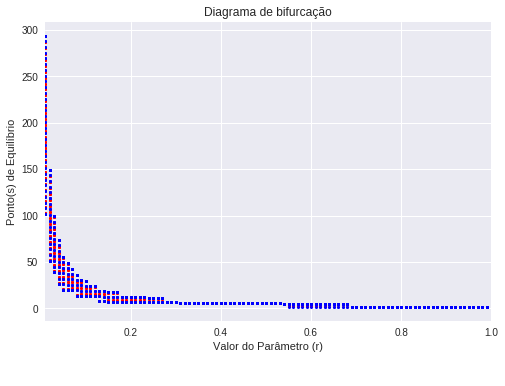

In [80]:
plt.style.use('seaborn')
# if True, it also plots the phase portrait
if True:
    plt.figure()
    xx =  np.arange(-10, 10, .05) 
    plt.plot(xx, 0*xx, 'k-' , lw=1.5)
    plt.get_cmap('plasma')
    for ri in r[1:-1:int(len(r)/6)]:
        plt.plot(xx, func(xx, 0, ri), '--' ,lw=1.0)
    plt.xlabel("x")
    plt.ylabel("dx/dt")
    plt.title("Espaço de fase")

plt.figure()
ax = plt.subplot(111)
plt.xlim(RMIN, RMAX)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.plot(np.tile(r, len(x0)) , unstable, 'r.', label='Instável', markersize=5)
plt.plot(np.tile(r, len(x0)) , stable,   'b.' ,label='Estável' , markersize=5)
plt.xlabel("Valor do Parâmetro (r)")
plt.ylabel("Ponto(s) de Equilíbrio")
plt.title("Diagrama de bifurcação")

plt.show()